In [36]:
from dataWrangler import *
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import glob 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [37]:
li=[]
for filename in glob.glob(r"..\UsedCar-PriceEstimator\data\*.csv"):
    collection = pd.read_csv(filename, index_col=None, header=0)
    li.append(collection)
frame = pd.concat(li, axis=0, ignore_index=True)

In [30]:
#_=sns.pairplot(data=df)

In [31]:
make='toyota camry'

In [38]:
df=Spell(frame)
df=Replace(df)
df=Process(df)
#df=Outliers_light(df)

Text(0, 0.5, 'Log Price')

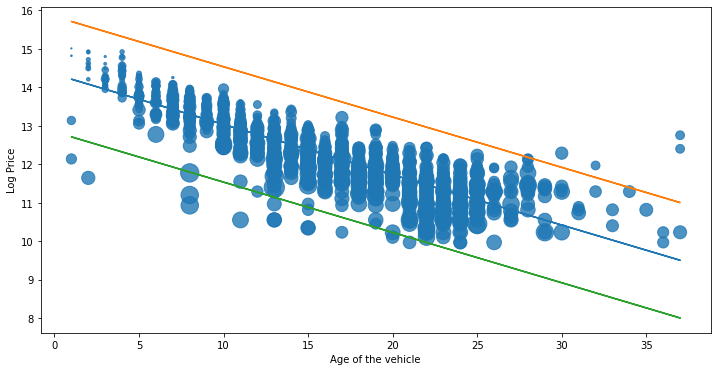

In [33]:
plt.figure(figsize=(12,6))
plt.scatter(df['year:'],df['price:'], s=df['odometer:']/1000, alpha=0.8)
m, b = np.polyfit(df['year:'], df['price:'], 1)
plt.plot(df['year:'], m*df['year:']+ b)
plt.plot(df['year:'], m*df['year:']+ b+1.5)
plt.plot(df['year:'], m*df['year:']+ b-1.5)
plt.xlabel('Age of the vehicle')
plt.ylabel('Log Price')

In [34]:
df=delete_outliers(df)

Text(0, 0.5, 'Log Price')

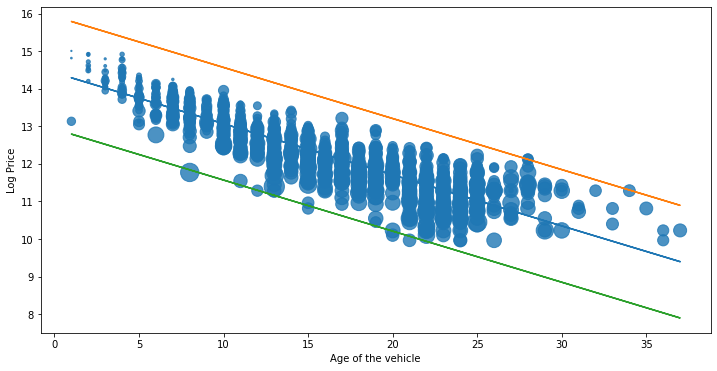

In [35]:
plt.figure(figsize=(12,6))
plt.scatter(df['year:'],df['price:'], s=df['odometer:']/1000, alpha=0.8)
m, b = np.polyfit(df['year:'], df['price:'], 1)
plt.plot(df['year:'], m*df['year:']+ b)
plt.plot(df['year:'], m*df['year:']+ b+1.5)
plt.plot(df['year:'], m*df['year:']+ b-1.5)
plt.xlabel('Age of the vehicle')
plt.ylabel('Log Price')

### Below is the delete_outliers() function implementation 

In [18]:
try:
    m, b = np.polyfit(df['year:'], df['price:'], 1)
except:
    m, b = np.polyfit(df['year:'], df['price:'], 1)
df_new=df
for x,y in zip(df['year:'], m*df['year:']+ b-0.5):
    left=x
    bottom=y
    multi_outliers = df_new[(df_new['price:'] <bottom) & (df_new['year:'] < left)]
    df_new=df_new[(~df_new.isin(multi_outliers) )]
for x,y in zip(df['year:'], m*df['year:']+ b+0.5):
    right=x
    top=y
    multi_outliers2 = df[(df['price:'] >top) & (df['year:'] > right) ]
    df_new=df_new[(~df_new.isin(multi_outliers2) )]


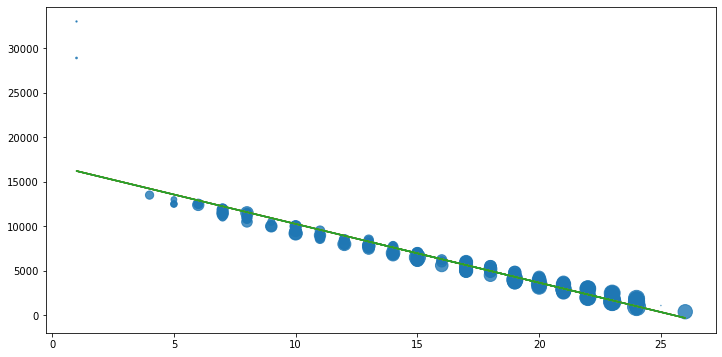

In [19]:
df_new=df_new.dropna()
plt.figure(figsize=(12,6))
plt.scatter(df_new['year:'],df_new['price:'], s=df_new['odometer:']/1000, alpha=0.8)
m, b = np.polyfit(df_new['year:'], df_new['price:'], 1)
plt.plot(df_new['year:'], m*df_new['year:']+ b)
plt.plot(df_new['year:'], m*df_new['year:']+ b+0.5)
plt.plot(df_new['year:'], m*df_new['year:']+ b-0.5)


In [13]:
#import pandas_profiling
#profile=df.profile_report()

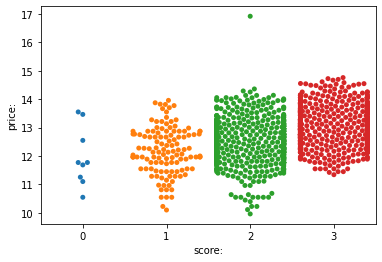

In [155]:
_=sns.swarmplot(x='score:',y='price:',data=df)


In [ ]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red x's
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


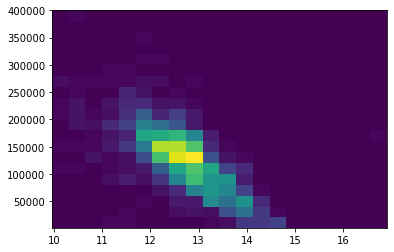

In [156]:
_=plt.hist2d(df['price:'], df['odometer:'], bins=(20,20))

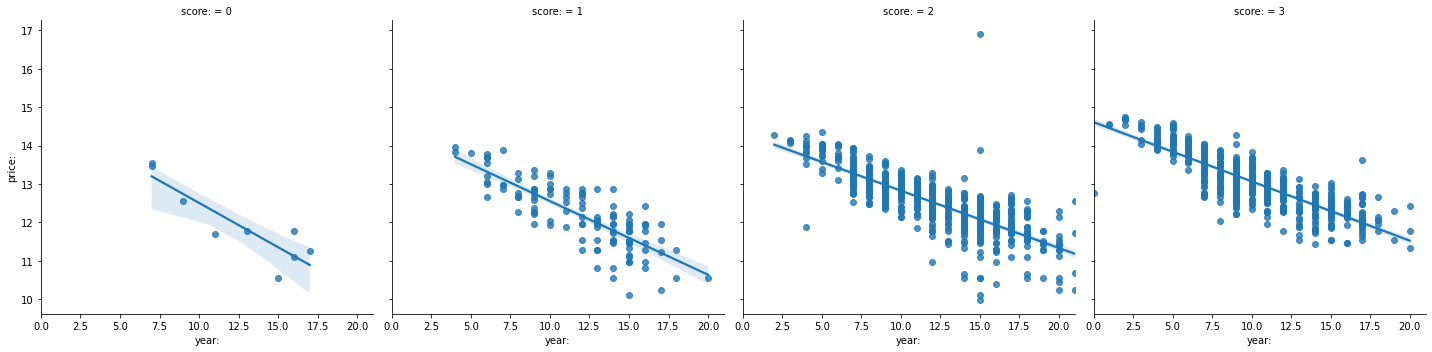

In [160]:
_=sns.lmplot(col='score:',x='year:', y='price:', data=df)

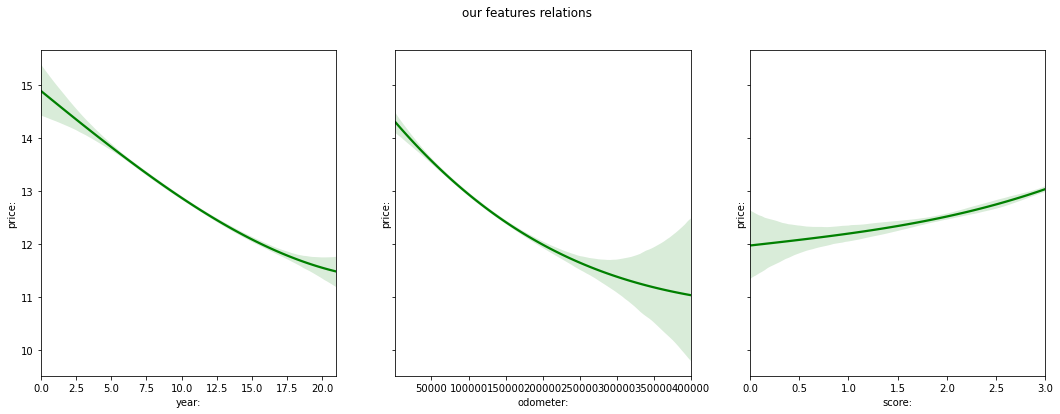

In [161]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('our features relations')

sns.regplot(ax=axes[0],x='year:', y='price:', data=df, scatter=None, order=3, color='green')
sns.regplot(ax=axes[1],x='odometer:', y='price:', data=df, scatter=None, order=3, color='green')
sns.regplot(ax=axes[2],x='score:', y='price:', data=df, scatter=None, order=3, color='green')


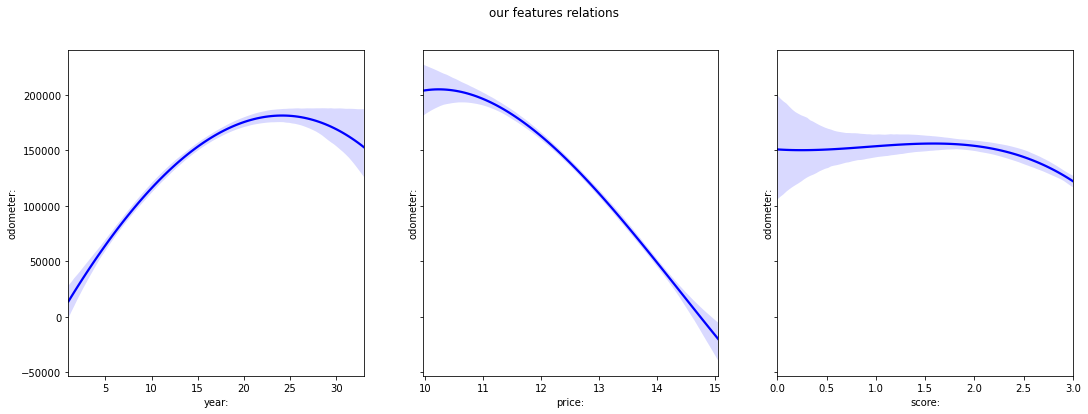

In [122]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('our features relations')

sns.regplot(ax=axes[0],x='year:', y='odometer:', data=df, scatter=None, order=3, color='blue')
sns.regplot(ax=axes[1],x='price:', y='odometer:', data=df, scatter=None, order=3, color='blue')
sns.regplot(ax=axes[2],x='score:', y='odometer:', data=df, scatter=None, order=3, color='blue')


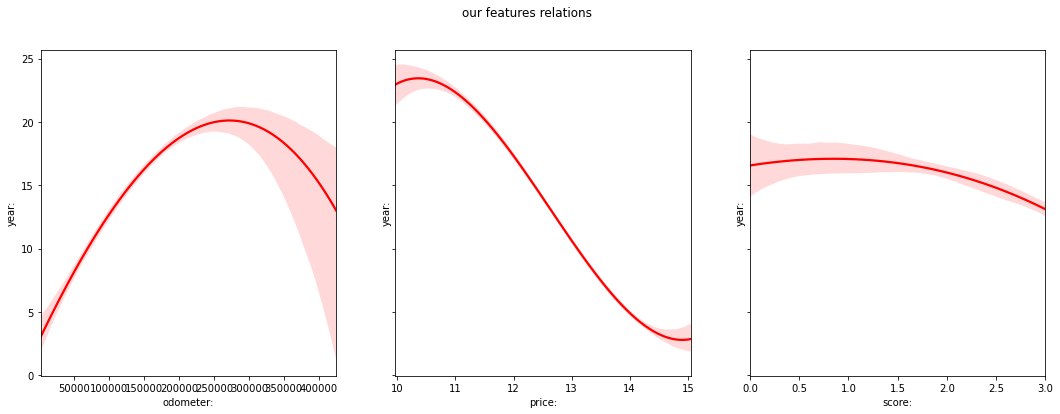

In [123]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('our features relations')

sns.regplot(ax=axes[0],x='odometer:', y='year:', data=df, scatter=None, order=3, color='red')
sns.regplot(ax=axes[1],x='price:', y='year:', data=df, scatter=None, order=3, color='red')
sns.regplot(ax=axes[2],x='score:', y='year:', data=df, scatter=None, order=3, color='red')


In [39]:
df = all_makes['Make&Model'].value_counts().rename_axis('unique_values').to_frame('counts')
#df_test=df_test[(df_test['counts']>430) & (df_test['counts']<620) ]
thelist=list(df.unique_values)

In [56]:
df[280:299]

,counts
unique_values,
jeep compass,38
ford e450,37
chevrolet cobalt,37
chevrolet bel,37
toyota venza,37
bmw 740i,36
jeep cj5,36
audi tt,36
mazda 5,35
